In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("P:\\DATA SCIENCE\\Udemy Courses\\OwnDataScience_Practice\\Begineer\\IrisDataSet\\Iris.csv",
                    header=None,names=["Sepal_len","Sepal_width","Petal_len","Petal_width","Class"])
dataset=dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,Sepal_len,Sepal_width,Petal_len,Petal_width,Class
0,6.3,3.3,4.7,1.6,Iris-versicolor
1,5.7,2.8,4.1,1.3,Iris-versicolor
2,5.2,2.7,3.9,1.4,Iris-versicolor
3,6.4,2.9,4.3,1.3,Iris-versicolor
4,5.6,2.7,4.2,1.3,Iris-versicolor


In [3]:
#To check the summary of the data what is the mean ,Median, Std, minimum value and maximum values
dataset.describe()

,Sepal_len,Sepal_width,Petal_len,Petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
#To check the shape of the dataset
dataset.shape

(150, 5)

In [5]:
#Check weather is there any null values in the dataset
dataset.count()

Sepal_len      150
Sepal_width    150
Petal_len      150
Petal_width    150
Class          150
dtype: int64

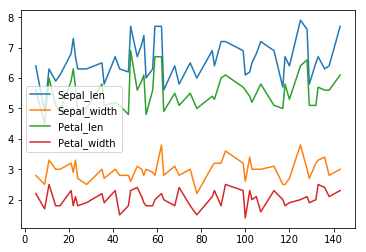

In [6]:
#Graph that shows how the sepal and petal len and width present in the data set
dataset[dataset['Class']=='Iris-virginica'].plot()

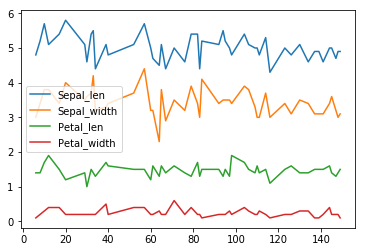

In [7]:
dataset[dataset['Class']=='Iris-setosa'].plot()

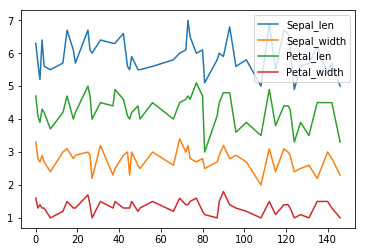

In [8]:
dataset[dataset['Class']=='Iris-versicolor'].plot()

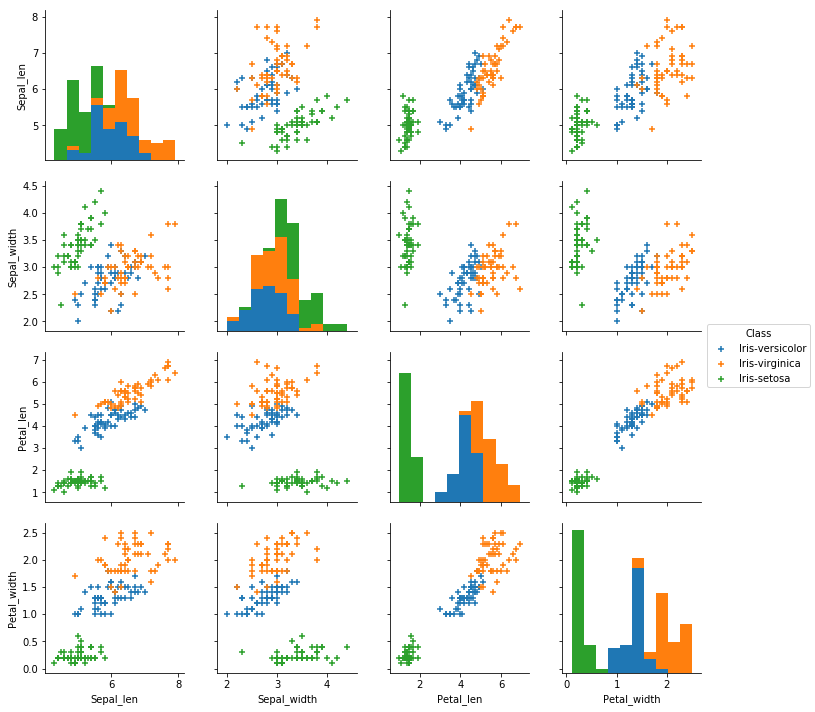

In [9]:
#How the values of sepal and petal distributed based on the Classes of the Outcome and we can see cluster are being formed
g = sns.pairplot(dataset, hue='Class', markers='+')
plt.show()

In [10]:
#Converting the categorical value into numerical form so we can train our Model
from sklearn.preprocessing import LabelEncoder
labelEncoder=LabelEncoder()
dataset.iloc[:,4]=labelEncoder.fit_transform(dataset.iloc[:,4])
dataset['Class'].head(10)

0    1
1    1
2    1
3    1
4    1
5    2
6    0
7    1
8    0
9    2
Name: Class, dtype: int64

In [16]:
#Splitting the dataset in train and test so we can train our model
#Try different random_state as different random state can help to get good training data this was the best random_state in case of mine

from sklearn.model_selection import train_test_split
X_data=dataset.iloc[:,0:4]
Y_data=dataset.iloc[:,4]
X_train,X_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=21)

In [17]:
#As this is a Classification problem we are using the Classification Model
from sklearn.linear_model import LogisticRegression
logClassifier=LogisticRegression()
logClassifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
#Predicting the output for the test data
y_pred=logClassifier.predict(X_test)

In [19]:
#Confusion matrix gives us the detail how much right output was predicted and how much wrong output was predicted
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 14,  1],
       [ 0,  0,  8]], dtype=int64)

In [20]:
#Accuracy of the Model 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667